In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2023UnivData.csv')

In [3]:
df

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501+,5.8,501+,3.6,601+,...,601+,1.7,601+,NaN,NaN,8.1,601+,NaN,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501+,5.8,501+,2.4,601+,...,601+,9.3,601+,1.3,601+,8.8,601+,30.9,403,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501+,2.6,501+,3.2,601+,...,601+,5.2,601+,2.8,601+,51.1,601+,NaN,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,501+,1.8,501+,2.7,601+,...,601+,NaN,NaN,NaN,NaN,7.5,601+,8.7,601+,-


In [4]:
df.head(5)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [8]:
print(df.shape[0])
print(df.shape[1])

1422
21


In [10]:
df.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
ar rank           0
er score          1
er rank           0
fsr score         2
fsr rank          0
cpf score         5
cpf rank          0
ifr score        98
ifr rank         98
isr score        57
isr rank         57
irn score        13
irn rank         13
ger score        12
ger rank         12
score scaled      0
dtype: int64

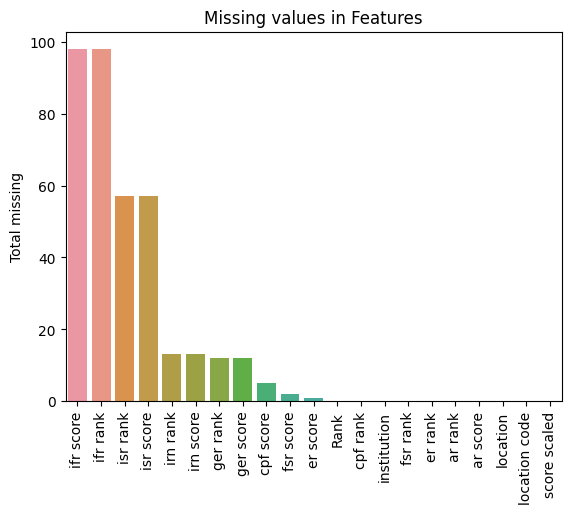

In [11]:
import seaborn as sns
missing_values = df.isnull().sum().sort_values(ascending = False)
sns.barplot(x = missing_values.index, y = missing_values)
plt.xticks(rotation = 90)
plt.title('Missing values in Features')
plt.ylabel('Total missing')
plt.show()

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

Rank             0
institution      0
location code    0
location         0
ar score         0
ar rank          0
er score         0
er rank          0
fsr score        0
fsr rank         0
cpf score        0
cpf rank         0
ifr score        0
ifr rank         0
isr score        0
isr rank         0
irn score        0
irn rank         0
ger score        0
ger rank         0
score scaled     0
dtype: int64

In [17]:
cat_features = ['location code', 'location']
df[cat_features] = df[cat_features].astype('category')

C:\Users\HP\AppData\Local\Temp\ipykernel_7304\1887516416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_features] = df[cat_features].astype('category')


In [20]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

C:\Users\HP\AppData\Local\Temp\ipykernel_7304\3977653374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


In [21]:
df.head()

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),89,90,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,88,89,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,89,90,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,88,89,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,89,90,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
